In [1]:
sentences = ['The future king is the prince',
'Daughter is the princess',
'Son is the prince',
'Only a man can be a king',
'Only a woman can be a queen',
'The princess will be a queen',
'Queen and king rule the realm',
'The prince is a strong man',
'The princess is a beautiful woman',
'The royal family is the king and queen and their children',
'Prince is only a boy now',
'A boy will be a man']

In [2]:
import re

def clean_text(string: str, 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()
    string = string.split()
    return string        

In [3]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in sentences:
    
    # Cleaning the text
    text = clean_text(text)
    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0: 
                word_lists.append([word] + [text[(i - w - 1)]])

In [4]:

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict 

In [5]:
unique_word_dict = create_unique_word_dict(all_text)

In [6]:
unique_word_dict

{'beautiful': 0,
 'boy': 1,
 'can': 2,
 'children': 3,
 'daughter': 4,
 'family': 5,
 'future': 6,
 'king': 7,
 'man': 8,
 'now': 9,
 'only': 10,
 'prince': 11,
 'princess': 12,
 'queen': 13,
 'realm': 14,
 'royal': 15,
 'rule': 16,
 'son': 17,
 'strong': 18,
 'their': 19,
 'woman': 20}

In [7]:
from tqdm import tqdm

In [8]:
from scipy import sparse
import numpy as np

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into an array
X = np.asarray(X)
Y = np.asarray(Y)

84it [00:00, 84146.53it/s]


In [9]:
X.shape

(84, 21)

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# Deep learning: 
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 3.0359
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0349
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.0339
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.0329
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0319
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0309
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.0300
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.0290
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0280
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.0270
Epoch 11/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.0260
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0251
Epoch 13/1000
1/1 [====================

In [19]:
embedding_dict

{'beautiful': array([-0.87465465,  0.8497392 ], dtype=float32),
 'boy': array([ 0.44898626, -1.0099522 ], dtype=float32),
 'can': array([ 0.2988781 , -0.10821345], dtype=float32),
 'children': array([1.3491514, 1.2529714], dtype=float32),
 'daughter': array([-1.4174744,  1.3436497], dtype=float32),
 'family': array([0.8769807, 0.867697 ], dtype=float32),
 'future': array([ 1.146523, -0.713344], dtype=float32),
 'king': array([0.8530513 , 0.49871245], dtype=float32),
 'man': array([-0.72541434, -1.4106172 ], dtype=float32),
 'now': array([-0.35559928, -1.1456603 ], dtype=float32),
 'only': array([-0.8986018, -1.0404962], dtype=float32),
 'prince': array([-0.86305374, -1.1615238 ], dtype=float32),
 'princess': array([-0.69253975,  1.1320776 ], dtype=float32),
 'queen': array([-0.12915093,  0.13564856], dtype=float32),
 'realm': array([ 1.5355452, -0.7194913], dtype=float32),
 'royal': array([-0.01932255, -0.6600409 ], dtype=float32),
 'rule': array([0.948663  , 0.79867727], dtype=float32

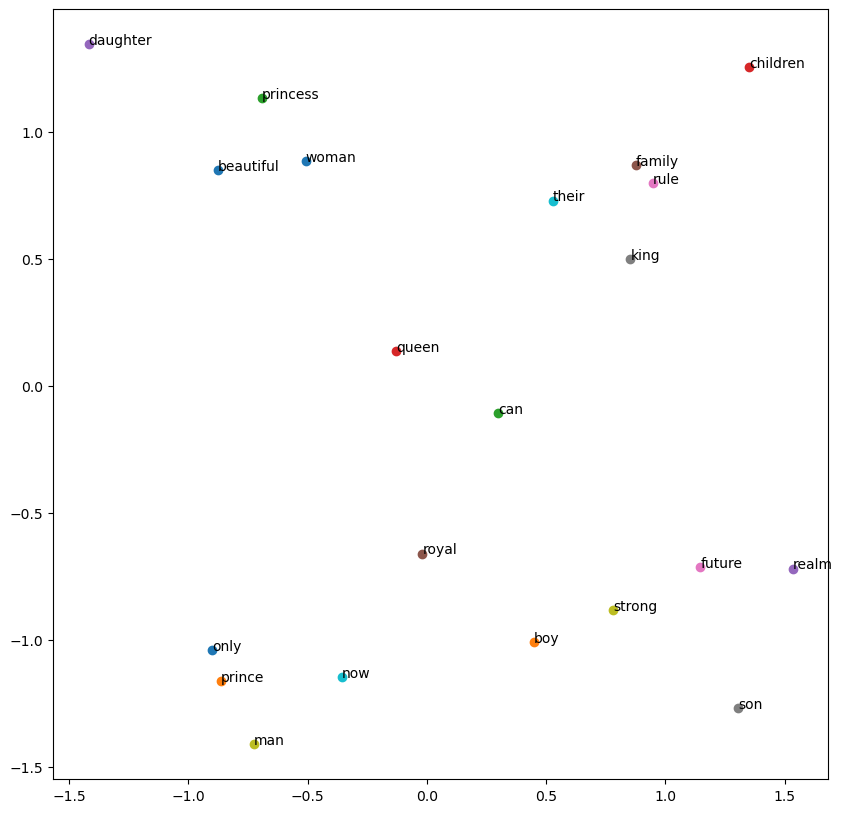

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
  coord = embedding_dict.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))